# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [5]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        S_W = np.zeros((n_features, n_features))
        for label in labels:
            class_samples = X[y == label]
            mean_class = np.mean(class_samples, axis=0)
            for sample in class_samples:
                diff = (sample - mean_class).reshape(n_features, 1)
                S_W += diff.dot(diff.T)
        
        # Between class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        overall_mean = np.mean(X, axis=0).reshape(n_features, 1)

        S_B = np.zeros((n_features, n_features))
        for label in labels:
            class_samples = X[y == label]
            n_class_samples = class_samples.shape[0]
            mean_class = np.mean(class_samples, axis=0).reshape(n_features, 1)
            diff = (mean_class - overall_mean).reshape(n_features, 1)
            S_B += n_class_samples * diff.dot(diff.T)
            
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        S_W_inv = np.linalg.inv(S_W)
        S_W_inv_S_B = S_W_inv.dot(S_B)
        
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        eigenvalues, eigenvectors = np.linalg.eig(S_W_inv_S_B)
        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X,y):
        ########### Write Your Code Here ###########
        self.fit(X, y)
        return self.transform(X)
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        return X.dot(self.eigenvectors)

- <font size=4> Dimensionality reduction visualization<font>

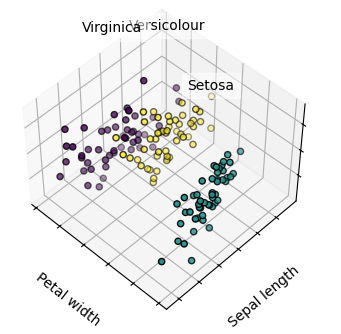

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])


ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [13]:
########### Write Your Code Here ###########
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

############################################

In [14]:
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)


<class 'numpy.ndarray'> (56000, 784)
<class 'numpy.ndarray'> (56000,)


###  Visualization of MINIST

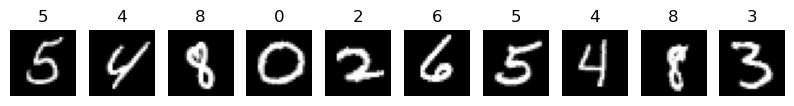

In [15]:
# Visualize MINIST
########### Write Your Code Here ###########
import matplotlib.pyplot as plt

def plot_samples(X, y, num_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(str(y.iloc[i]) if hasattr(y, 'iloc') else str(y[i]))  # Handle DataFrame/Series
        plt.axis('off')
    plt.show()

# Visualize some samples
plot_samples(X_train, y_train)

############################################

### Fit  Model

In [16]:
########### Write Your Code Here ###########
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=9)  # 10 classes - 1
lda.fit(X_train, y_train)
############################################

LinearDiscriminantAnalysis(n_components=9)

## Evaluate model

In [17]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score, classification_report

y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))
############################################

Accuracy: 86.77%
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1343
           1       0.87      0.96      0.91      1600
           2       0.90      0.81      0.85      1380
           3       0.85      0.84      0.85      1433
           4       0.84      0.89      0.87      1295
           5       0.82      0.82      0.82      1273
           6       0.93      0.91      0.92      1396
           7       0.92      0.84      0.88      1503
           8       0.81      0.79      0.80      1357
           9       0.80      0.86      0.83      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



d:\Program\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?

优势：
1. 降维
2. 最大化不同类之间的分离

劣势：
1. 假设类之间是正态分布
2. 对离群点敏感，离群点可能扭曲均值和方差的估计
3. 若样本少，则影响效果

- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?

LDA: 最大化类之间的可分性，需要类别标签

PCA: 不需要类别标签，是一种无监督方法。它计算数据的协方差矩阵，并从其特征值和特征向量中推导出主成分。保留方差最大的方向，这些方向可能与类的分离性无关